In [1]:
from sympy import *
init_printing()

In [2]:
x, lamda, Rp, Rm, t, u, v = symbols('x \lambda R^+ R^- t u v')
x, lamda, Rp, Rm, t, u, v

## Only makes expressions more complex
#x, lamda, Rp, Rm = symbols('x \lambda R^+ R^-', real=True)
#t, u, v = symbols('t u v', positive=True)

## Grid-characteristic method derivation

Consider Hopf equation:

$$
\dfrac{\partial u}{\partial t} + u \dfrac{\partial u}{\partial x} = 0
$$

With initial conditions:

$$
u(x, 0) = \phi(x) \ge \varepsilon > 0
$$

Divergent form:

$$
\dfrac{\partial u}{\partial t} + \dfrac{\partial}{\partial x} \dfrac{u^2}{2} = 0
$$

Let $v = u^2$

By multiplication by $2 u$ second divergent form can be got:

$$
\dfrac{\partial u^2}{\partial t} + \dfrac{\partial}{\partial x} \dfrac{2u^3}{3} = 
\dfrac{\partial v}{\partial t} + \dfrac{2}{3} \dfrac{\partial u v}{\partial x} = 
\dfrac{\partial v}{\partial t} + \dfrac{2 v}{3} \dfrac{\partial u}{\partial x} + \dfrac{2 u}{3} \dfrac{\partial v}{\partial x} = 0
$$

Whole system:

$$
\begin{cases}
    \dfrac{\partial u}{\partial t} + \dfrac{\partial}{\partial x} \dfrac{u^2}{2} = 0 \\ \\
    \dfrac{\partial v}{\partial t} + \dfrac{2 v}{3} \dfrac{\partial u}{\partial x} + \dfrac{2 u}{3} \dfrac{\partial v}{\partial x} = 0
\end{cases}
$$

Or:

$$
\dfrac{\partial}{\partial t} \begin{bmatrix} u \\ v \end{bmatrix} + A \dfrac{\partial}{\partial x} \begin{bmatrix} u \\ v \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

Where:

$$
A = \begin{bmatrix} 0 & \dfrac{1}{2} \\ \dfrac{2 v}{3} & \dfrac{2 u}{3} \end{bmatrix}
$$

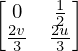

In [3]:
A = Matrix([
    [0, '1/2'], 
    [2 * v / 3, 2 * u / 3]
])
A

Characteristic polynomial of $A$: $|A - \lambda E| = 0 $

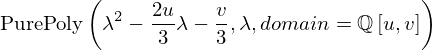

In [4]:
charpoly = A.charpoly(lamda)
charpoly

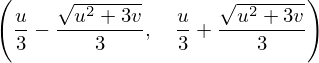

In [5]:
l1, l2 = solve(charpoly, lamda)
l1, l2

By left-side diagonalization of $A$ the system can be transformed to:



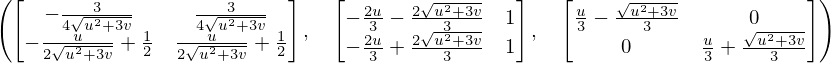

In [6]:
H, L = A.T.diagonalize()
H = simplify(H.T)
simplify(H.inv()), H, L

In [7]:
A == simplify(H.inv() * L * H)

True

In [8]:
du, dv, dRp, dRm = symbols('\delta\ u \delta\ v \delta\ R^+ \delta\ R^-')
du, dv, dRp, dRm

### First approach

Wrong(?) way

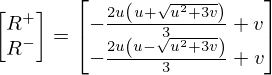

In [9]:
Eq(Matrix([[Rp], [Rm]]), simplify(H * Matrix([[u], [v]])))

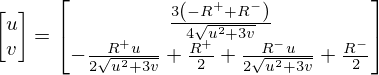

In [10]:
Eq(Matrix([[u], [v]]), simplify(H.inv() * Matrix([[Rp], [Rm]])))

### Second approach

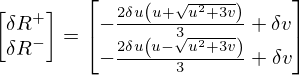

In [11]:
Eq(Matrix([[dRp], [dRm]]), simplify(H * Matrix([[du], [dv]])))

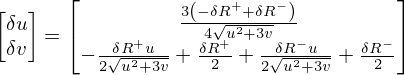

In [12]:
Eq(Matrix([[du], [dv]]), simplify(H.inv() * Matrix([[dRp], [dRm]])))